# PyTorch for CIFAR10
We test VGG classifier.
First init some basic environment.

In [40]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# VGG13 classifier

In [41]:
import torch.optim as optim
import torch.nn as nn
import time
from cifar10_solver import CIFAR10Solver, plot_history
from classifiers.vgg import VGG11, VGG13

vgg13 = VGG13()
print(vgg13)

_VGG(
  (layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3),

# train

In [42]:
%%time
opt = optim.SGD(vgg13.parameters(), lr=1e-1, momentum=0.9, weight_decay=5e-4, nesterov=True)
loss_fn = nn.CrossEntropyLoss()
solver = CIFAR10Solver(vgg13, opt, loss_fn)
reduce_lr = lambda epoch: 0.5 ** (epoch // 15)
lr_scheduler = optim.lr_scheduler.LambdaLR(opt, lr_lambda=[reduce_lr])
# lr_scheduler = optim.lr_scheduler.MultiStepLR(opt, milestones=[80, 90], gamma=0.1)
history = solver.train(epochs=150, lr_scheduler=lr_scheduler, train_batch_size=128)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
train on device: cuda:0
start training. epoch steps: 352
Epoch: 1/150, lr:1.00e-01
[##################################################] 100.00% loss:2.2 acc:16.65% val_loss:2.0 val_acc:24.10%
Epoch: 2/150, lr:1.00e-01
[##################################################] 100.00% loss:1.7 acc:32.47% val_loss:1.6 val_acc:40.82%
Epoch: 3/150, lr:1.00e-01
[##################################################] 100.00% loss:1.4 acc:48.77% val_loss:1.4 val_acc:49.84%
Epoch: 4/150, lr:1.00e-01
[##################################################] 100.00% loss:1.1 acc:60.62% val_loss:1.0 val_acc:62.68%
Epoch: 5/150, lr:1.00e-01
[##################################################] 100.00% loss:0.91 acc:67.84% val_loss:1.0 val_acc:64.42%
Epoch: 6/150, lr:1.00e-01
[##################################################] 100.00% loss:0.77 acc:73.32% val_loss:0.82 val_acc:71.72%
Epoch: 7/150, lr

[##################################################] 100.00% loss:0.078 acc:97.33% val_loss:0.35 val_acc:90.06%
Epoch: 60/150, lr:1.25e-02
[##################################################] 100.00% loss:0.082 acc:97.14% val_loss:0.38 val_acc:89.46%
Epoch: 61/150, lr:6.25e-03
[##################################################] 100.00% loss:0.04 acc:98.62% val_loss:0.32 val_acc:91.90%
Epoch: 62/150, lr:6.25e-03
[##################################################] 100.00% loss:0.031 acc:98.99% val_loss:0.32 val_acc:92.14%
Epoch: 63/150, lr:6.25e-03
[##################################################] 100.00% loss:0.026 acc:99.12% val_loss:0.31 val_acc:92.48%
Epoch: 64/150, lr:6.25e-03
[##################################################] 100.00% loss:0.025 acc:99.19% val_loss:0.32 val_acc:92.40%
Epoch: 65/150, lr:6.25e-03
[##################################################] 100.00% loss:0.022 acc:99.30% val_loss:0.33 val_acc:92.38%
Epoch: 66/150, lr:6.25e-03
[###########################

[##################################################] 100.00% loss:0.0015 acc:99.99% val_loss:0.32 val_acc:93.20%
Epoch: 118/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0016 acc:99.99% val_loss:0.31 val_acc:93.28%
Epoch: 119/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0016 acc:99.99% val_loss:0.32 val_acc:93.36%
Epoch: 120/150, lr:7.81e-04
[##################################################] 100.00% loss:0.0015 acc:99.98% val_loss:0.31 val_acc:93.36%
Epoch: 121/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0016 acc:99.98% val_loss:0.31 val_acc:93.24%
Epoch: 122/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0017 acc:99.98% val_loss:0.32 val_acc:93.18%
Epoch: 123/150, lr:3.91e-04
[##################################################] 100.00% loss:0.0016 acc:99.98% val_loss:0.31 val_acc:93.26%
Epoch: 124/150, lr:3.91e-04
[############

# plot loss history
We check the classifier by plotting the loss and acc.

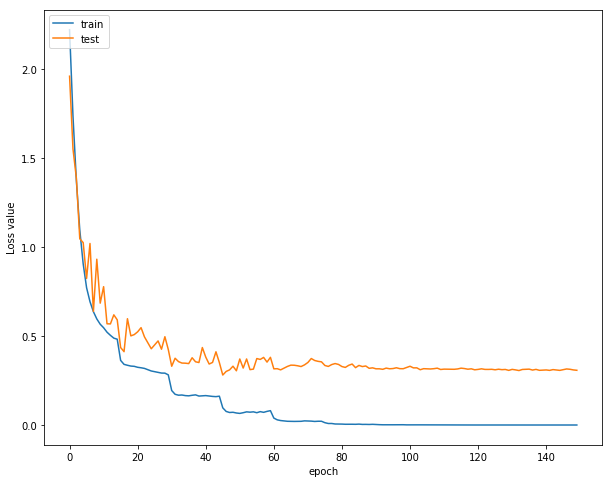

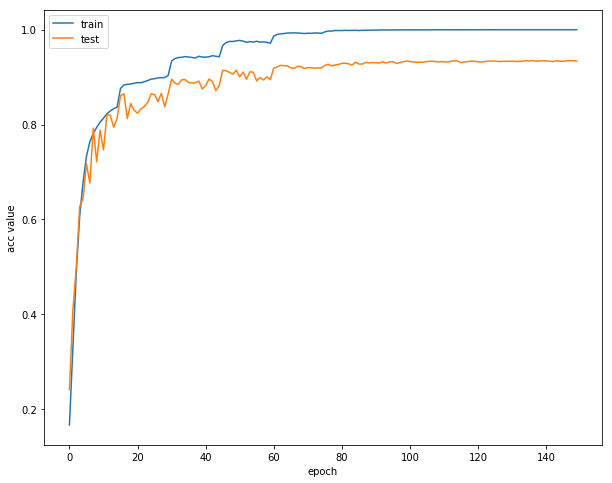

In [43]:
plot_history(history)

# test

In [44]:
test_loss, test_acc = solver.test(test_batch_size=128)
print('test_loss:{:.2} test_acc:{:.2%}'.format(test_loss, test_acc))

test_loss:0.31 test_acc:93.38%
